<a href="https://colab.research.google.com/github/BAravind-5/Task_9/blob/main/Task9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("waqasishtiaq/credit-card-fraud-dataset")

print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:00<00:00, 253MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/waqasishtiaq/credit-card-fraud-dataset/versions/1


In [ ]:
import pandas as pd
import os

# The 'path' variable from the previous cell points to the dataset's directory.
# Let's list its contents to find the CSV file.
# print(os.listdir(path))

# Now that we've identified the CSV file, we can read it.
df = pd.read_csv(os.path.join(path, 'creditcard.csv'))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
df['Class'].value_counts(normalize=True)

,proportion
Class,
0,0.998273
1,0.001727


The dataset is highly imbalanced, with fraudulent transactions
representing a very small fraction of total transactions.

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Stratified splitting ensures fraud and non-fraud ratios
remain similar in training and testing data.

In [ ]:
from sklearn.linear_model import LogisticRegression

baseline = LogisticRegression(max_iter=1000)
baseline.fit(X_train, y_train)

y_pred_lr = baseline.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

lr_precision, lr_recall, lr_f1

(0.8395061728395061, 0.6938775510204082, 0.7597765363128491)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [ ]:
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

rf_precision, rf_recall, rf_f1

(0.9411764705882353, 0.8163265306122449, 0.8743169398907104)

Precision, recall, and F1-score are more reliable than accuracy
for fraud detection due to extreme class imbalance.

In [ ]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Precision': [lr_precision, rf_precision],
    'Recall': [lr_recall, rf_recall],
    'F1-Score': [lr_f1, rf_f1]
})

comparison

,Model,Precision,Recall,F1-Score
0,Logistic Regression,0.839506,0.693878,0.759777
1,Random Forest,0.941176,0.816327,0.874317


Random Forest outperforms Logistic Regression by capturing
non-linear patterns in transaction data.

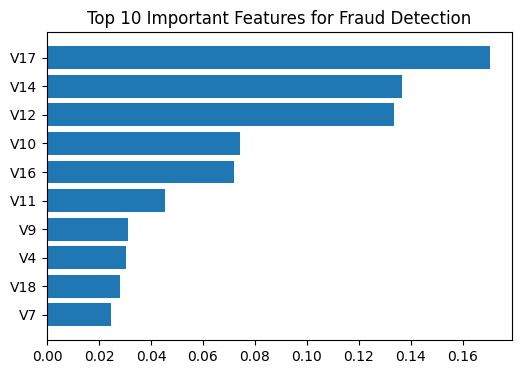

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(6,4))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Top 10 Important Features for Fraud Detection")
plt.show()

In [ ]:
import joblib

joblib.dump(rf, "random_forest_fraud_model.pkl")

['random_forest_fraud_model.pkl']

Model Selection:

Random Forest was selected as the final model due to its superior
precision-recall balance compared to Logistic Regression.

In [ ]:
from google.colab import files

files.download('random_forest_fraud_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>